<a href="https://colab.research.google.com/github/SakshiKhatiwada/6th-sem-.net/blob/main/Deep-Learning/Building_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
louishgy_churn_modelling_path = kagglehub.dataset_download('louishgy/churn-modelling')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-modelling/Churn_Modelling.csv


In [ ]:
df = pd.read_csv('/kaggle/input/churn-modelling/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [ ]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [ ]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [ ]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [ ]:
X = df.drop(columns=['Exited'])
y = df['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state = 1)

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

### Time for Keras Implementation now

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

# model.add(Dense(3, activation='sigmoid', input_dim = 11)) # hidden layer
model.add(Dense(11, activation='relu', input_dim = 11)) # hidden layer
model.add(Dense(11, activation='relu')) # hidden layer
model.add(Dense(1, activation='sigmoid')) # output layer

# syntax: 3 nodes, activation function "sigmoid", since first one is connected to inputs, no. of inputs = 11


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss="binary_crossentropy", optimizer='Adam', metrics=['accuracy'])
# binary_crossentropy is also called log-loss

# model.compile(loss="binary_crossentropy", optimizer='Adam', metrics=['accuracy']) # gives accuracy score with loss

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)
# model.fit(X_train_scaled, y_train, epochs=10, validation_split=0.2)
# separating 20% customers from 80% of train customers

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8771 - loss: 0.3008 - val_accuracy: 0.8475 - val_loss: 0.3493
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8657 - loss: 0.3254 - val_accuracy: 0.8456 - val_loss: 0.3486
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8683 - loss: 0.3205 - val_accuracy: 0.8450 - val_loss: 0.3481
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8794 - loss: 0.3025 - val_accuracy: 0.8481 - val_loss: 0.3475
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8727 - loss: 0.3149 - val_accuracy: 0.8456 - val_loss: 0.3475
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8654 - loss: 0.3195 - val_accuracy: 0.8456 - val_loss: 0.3479
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8699 - loss: 0.3144 - val_accuracy: 0.8462 - val_loss: 0.3483
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8698 - loss: 0.3206 - val_accu

In [ ]:
model.layers[0].get_weights()

[array([[-4.83677536e-02,  1.58014800e-02,  6.99701071e-01,
         -1.19307697e-01, -3.79503280e-01, -1.01503752e-01,
          1.00286752e-01, -1.37091905e-01,  3.12209874e-02,
          1.63210347e-01,  1.31589010e-01],
        [-1.07331991e+00,  1.23917902e+00,  1.03542618e-01,
          7.95307159e-02,  1.28026769e-01, -4.56553809e-02,
         -6.45599440e-02, -3.03680629e-01, -8.54988158e-01,
          2.82128960e-01, -6.48597360e-01],
        [ 6.43934608e-02,  4.30566311e-01, -3.90870482e-01,
         -9.76641551e-02,  4.80183661e-01, -7.98010886e-01,
         -1.15942201e-02,  1.65426999e-01, -1.01548582e-01,
          2.89198220e-01,  3.54277849e-01],
        [ 2.72751581e-02,  1.67998806e-01, -8.80535841e-01,
         -5.98244667e-01, -3.30022037e-01,  1.07467175e-01,
          2.99739271e-01, -1.15592027e+00,  7.17004597e-01,
          3.60264122e-01, -4.15045530e-01],
        [ 1.47628952e-02, -4.77749020e-01,  4.17876750e-01,
         -1.50434852e+00, -1.67225301e-01, -

In [ ]:
model.layers[1].get_weights()

[array([[-1.32749351e-02,  1.52139127e-01,  5.41126877e-02,
         -1.03880256e-01, -4.05972302e-01,  5.27549744e-01,
          3.12375188e-01,  2.63647199e-01,  1.57739356e-01,
          1.76293001e-01, -9.43729460e-01],
        [-1.54469967e-01,  3.67637468e-03, -4.83567119e-01,
          1.05532654e-01, -1.30115867e-01,  8.20988119e-01,
         -1.76011652e-01, -2.10153218e-02,  3.35476667e-01,
         -1.11085456e-02,  4.52553898e-01],
        [ 3.88995916e-01,  3.61781299e-01, -4.04434115e-01,
         -3.51376832e-03,  4.89570618e-01, -6.78817868e-01,
          5.06798327e-01,  1.16399057e-01, -8.85561943e-01,
          3.41637552e-01, -2.71969616e-01],
        [-5.71515203e-01, -5.85830927e-01,  3.42963457e-01,
         -1.57667473e-01, -5.19352019e-01,  1.86255485e-01,
         -6.51890159e-01, -1.13163278e-01, -1.05133963e+00,
         -6.96167469e-01,  3.41402858e-01],
        [ 9.77563113e-02,  2.90428489e-01,  1.84794769e-01,
         -1.99742138e-01,  4.90557820e-01, -

In [ ]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
y_pred = np.where(y_log>0.5, 1, 0)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8665

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
history.history

{'accuracy': [0.8689062595367432,
  0.8682812452316284,
  0.8681250214576721,
  0.8689062595367432,
  0.8696874976158142,
  0.8678125143051147,
  0.8690624833106995,
  0.8698437213897705,
  0.8685937523841858,
  0.8687499761581421,
  0.8682812452316284,
  0.8693749904632568,
  0.867968738079071,
  0.8693749904632568,
  0.8678125143051147,
  0.8685937523841858,
  0.8693749904632568,
  0.8692187666893005,
  0.8692187666893005,
  0.867968738079071,
  0.8701562285423279,
  0.8687499761581421,
  0.8690624833106995,
  0.8707812428474426,
  0.8693749904632568,
  0.8695312738418579,
  0.8700000047683716,
  0.8700000047683716,
  0.8684375286102295,
  0.8681250214576721,
  0.8676562309265137,
  0.8689062595367432,
  0.8696874976158142,
  0.8689062595367432,
  0.8704687356948853,
  0.8695312738418579,
  0.8700000047683716,
  0.8698437213897705,
  0.8696874976158142,
  0.8692187666893005,
  0.8695312738418579,
  0.8685937523841858,
  0.8701562285423279,
  0.8690624833106995,
  0.8687499761581421,


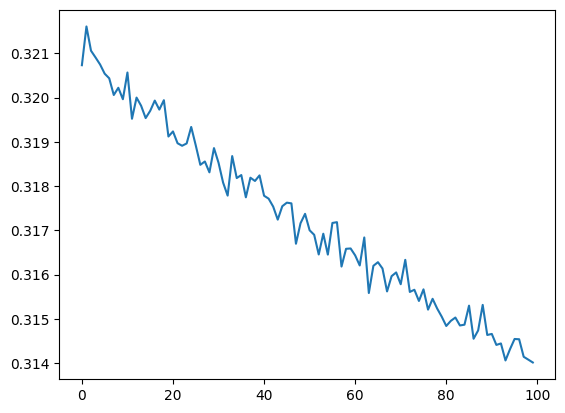

In [ ]:
plt.plot(history.history['loss'])

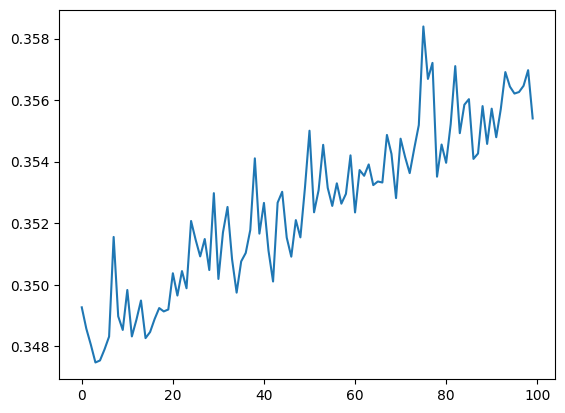

In [ ]:
plt.plot(history.history['val_loss'])


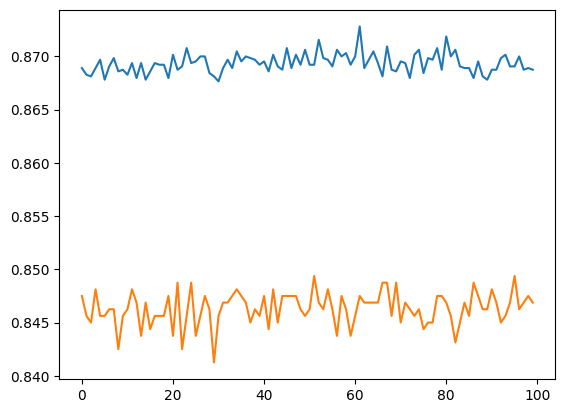

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
